# The "Right Stuff"

Author: **Makenzi Fischbach and Trevor Zou**

Run the cell below each time the notebook is started or restarted to ensure that if you change any code in the library, this notebook will use the latest version of the library code.## Introduction

In [3]:
%load_ext autoreload
%autoreload 2

import functions as f
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction

We like astronauts anda compelling stories. We decided to look at astronauts through the years to know more about astronauts.

## Method

### Getting the data
First we found a dataset. We found it using the Kaggle API.

In [4]:
nasa_astronaut_dataset = f.get_data()

nasa_astronaut_dataset["State"] = nasa_astronaut_dataset["Birth Place"].str[-2:]

nasa_astronaut_dataset.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,State
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,CA
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,MT
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,NY
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,MO
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,NJ


Here we have the dataset. Example of the Dataset.

Note that NaN's are there. We also decided to change the birth date and add the age they space-ed.

In [5]:
f.change_dates(nasa_astronaut_dataset)


,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,...,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,State,Selection Age
0,Joseph M. Acaba,2004.0,19.0,Active,1967.0,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,...,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,CA,37.0
1,Loren W. Acton,NaN,NaN,Retired,1936.0,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,...,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,MT,NaN
2,James C. Adamson,1984.0,10.0,Retired,1946.0,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,...,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,NY,38.0
3,Thomas D. Akers,1987.0,12.0,Retired,1951.0,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,...,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,MO,36.0
4,Buzz Aldrin,1963.0,3.0,Retired,1930.0,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,...,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,NJ,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,1956.0,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,...,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN,IN,34.0
353,Neil W. Woodward III,1998.0,17.0,Retired,1962.0,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,...,US Navy,0,0,0,0.0,NaN,NaN,NaN,IL,36.0
354,Alfred M. Worden,1966.0,5.0,Retired,1932.0,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,...,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN,MI,34.0
355,John W. Young,1962.0,2.0,Retired,1930.0,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,...,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN,CA,32.0


Once we had that, we started to look at some genearl trends across all of the astronauts, regadless of time.

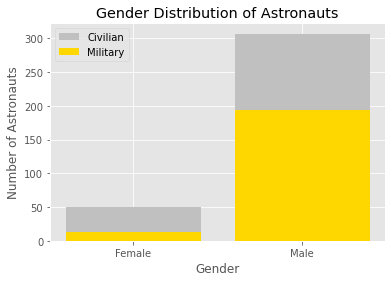

In [6]:
f.gender_military(nasa_astronaut_dataset)

We see that astronauts are predomately men, with a large portion of them coming from the military

We also wanted to look at what colleges astronauts came from. They came from alot of different colleges, so we decided to show the top 10.

new = f.frequency(nasa_astronaut_dataset, 7)
f.tops(new, 10)

Alot of people came from the army, as well as MIT! WOW!

We could do the same thing with undergraduate major.

In [7]:
new = f.frequency(nasa_astronaut_dataset, 8)
f.tops(new, 10)

{'Physics': 36,
 'Aerospace Engineering': 33,
 'Mechanical Engineering': 31,
 'Aeronautical Engineering': 29,
 'Electrical Engineering': 24,
 'Engineering Science': 13,
 'Engineering': 12,
 'Mathematics': 12,
 'Chemistry': 12,
 'Chemical Engineering': 9}

We see that alot of people majored in phsyics! WOW!

We also wanted to look at how many people went to grad school.

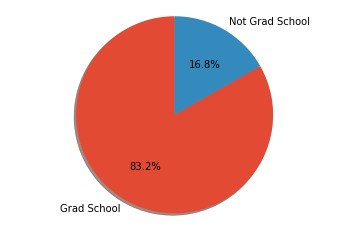

In [9]:
f.grad_school_vs_not_grad_school(nasa_astronaut_dataset)

Somewhat surprisingly, only 83 percent of astronauts went to grad school. It must have been before people needed to have a master's degree? There's alot of training and pass the NASA physical.

This then lead us to think about how astronauts have changed over time
We then wanted to look first at how the number of astronauts has changed over time.

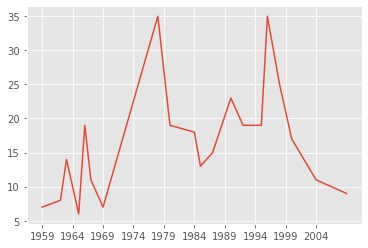

In [10]:
f.plot_astronauts_vs_time(nasa_astronaut_dataset)

Interesting. Probably has to do with politics or some shit!

Next we wanted to see how the average age of astronauts went over time!

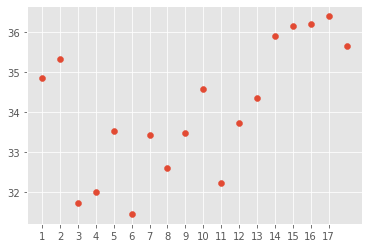

In [11]:
f.average_age_vs_group(nasa_astronaut_dataset)

Interestgly, the average age hasn't really fluctuated.

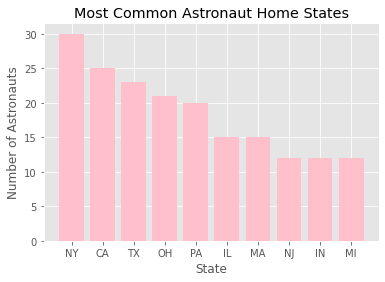

In [12]:
f.most_common_state(nasa_astronaut_dataset)

In [14]:
## Results

In [ ]:
## Conclusion